<a href="https://colab.research.google.com/github/yiwenwangANU/pytorch_learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
  weight = 0.7
  bias = 0.3

  start = 0
  end = 1
  step = 0.02

  X = torch.arange(start, end, step).unsqueeze(dim=1)
  y = weight * X + bias
  X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
train_split = int(len(X) * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train)

(40, 40)

In [ ]:
def plot_prediction(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, y_predict=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(X_train, y_train, c='b', s=4, label='Train Set')
  plt.scatter(X_test, y_test, c='g', s=4, label='Test Set')
  if y_predict is not None:
    plt.scatter(X_test, y_predict, c='r', s=4, label='Predict Set')
  plt.legend(prop={'size': 14})
  plt.show

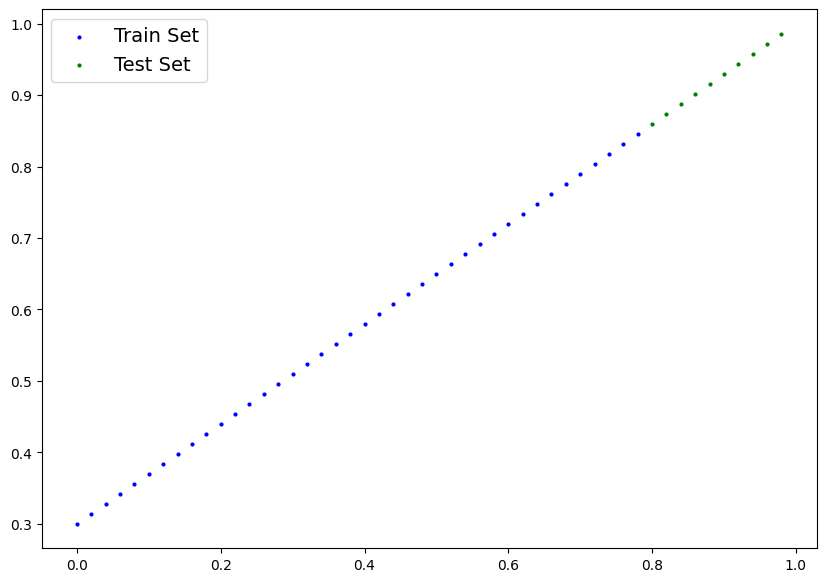

In [ ]:
plot_prediction(X_train, y_train, X_test, y_test, None)

In [ ]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
epochs = 200
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()


In [ ]:
with torch.inference_mode():
  test_pred = model_0(X_test)
  test_loss = loss_fn(test_pred, y_test)
  print(test_loss)

tensor(0.0084)


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)
class model_1(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, x):
    return self.weights * x + self.bias

In [ ]:
model = model_1()

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)
epochs = 300

epoch_count = []
loss_values =[]
test_loss_values = []

for epoch in range(epochs):
  model.train()
  y_pred = model(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test_pred = model(y_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4698256850242615
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.33382871747016907
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.20348870754241943
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.12975125014781952
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.09794081002473831
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.08290375024080276
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.07198350876569748
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.06314468383789062
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.05430586263537407
Epoch: 90 | Loss: 0.02788739837706089 | Test Loss: 0.046160854399204254
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.0373220220208168
Epoch: 110 | Loss: 0.021020207554101944 | Test Loss: 0.028483206406235695
Epoch: 120 | Loss: 0.01758546568453312 | Test Loss: 0.021132390946149826
Epoch: 130 | Loss: 0.014155393466353416 | Test Loss: 0.01543951593339443

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

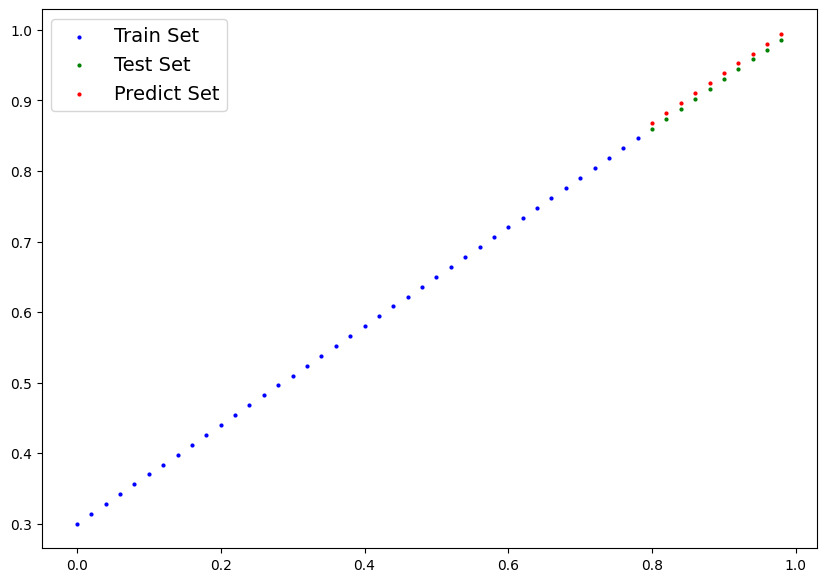

In [ ]:
with torch.inference_mode():
  y_pred_new = model(X_test)
  plot_prediction(y_predict=y_pred_new)

In [ ]:
loss_values

[tensor(0.3129, grad_fn=<MeanBackward0>),
 tensor(0.1977, grad_fn=<MeanBackward0>),
 tensor(0.0891, grad_fn=<MeanBackward0>),
 tensor(0.0531, grad_fn=<MeanBackward0>),
 tensor(0.0454, grad_fn=<MeanBackward0>),
 tensor(0.0417, grad_fn=<MeanBackward0>),
 tensor(0.0382, grad_fn=<MeanBackward0>),
 tensor(0.0348, grad_fn=<MeanBackward0>),
 tensor(0.0313, grad_fn=<MeanBackward0>),
 tensor(0.0279, grad_fn=<MeanBackward0>),
 tensor(0.0245, grad_fn=<MeanBackward0>),
 tensor(0.0210, grad_fn=<MeanBackward0>),
 tensor(0.0176, grad_fn=<MeanBackward0>),
 tensor(0.0142, grad_fn=<MeanBackward0>),
 tensor(0.0107, grad_fn=<MeanBackward0>),
 tensor(0.0073, grad_fn=<MeanBackward0>),
 tensor(0.0039, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackw

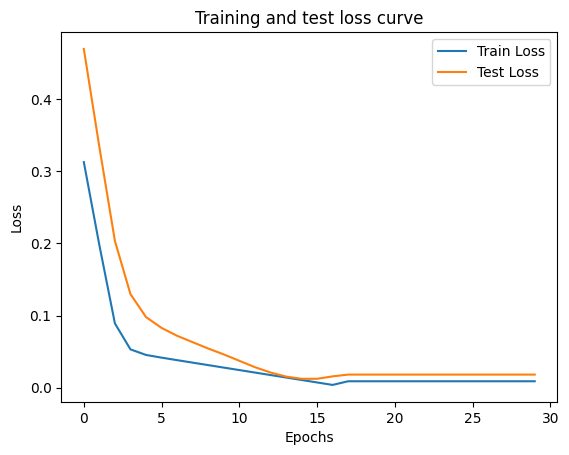

In [ ]:
epoch_count_np = list(range(len(loss_values)))  # create a list of epoch numbers if not already provided

# Convert lists of tensors to lists of their scalar values after detaching and moving to CPU
loss_values_np = [x.detach().cpu().item() for x in loss_values]
test_loss_values_np = [x.detach().cpu().item() for x in test_loss_values]

plt.plot(epoch_count_np, loss_values_np, label="Train Loss")
plt.plot(epoch_count_np, test_loss_values_np, label="Test Loss")
plt.title("Training and test loss curve")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Saving a PyTorch model


In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
from pathlib import Path

# Create model dir
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model name
MODEL_NAME = '01_pytorch_workflow_model_0.pt'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Save the model state dict
torch.save(model.state_dict(), MODEL_SAVE_PATH)

##Load a PyTorch model

In [ ]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

##Evaluate loaded model

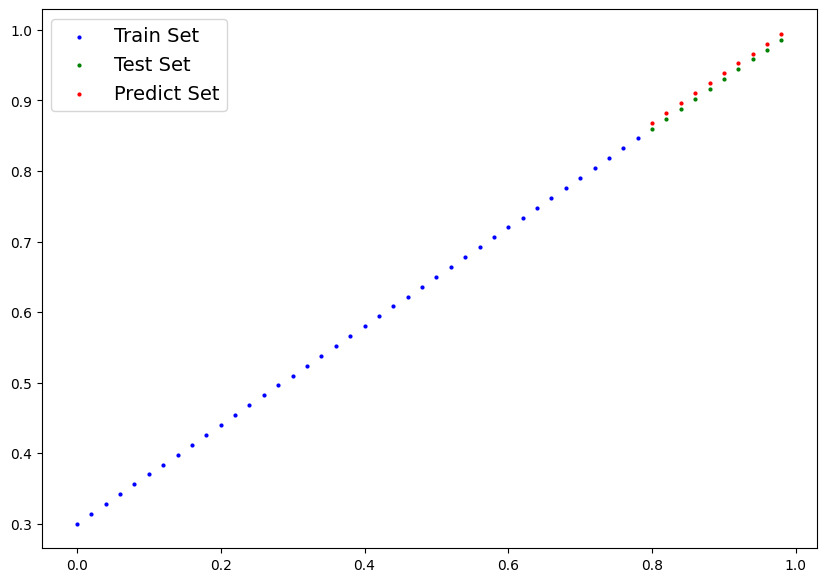

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_pred = loaded_model_0(X_test)
  plot_prediction(y_predict=loaded_pred)

In [ ]:
loaded_pred==y_pred_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])